<a href="https://colab.research.google.com/github/Shan-Niit/story/blob/main/ML_multilinear_regression_auto_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the Data

In [27]:
dataset = pd.read_csv("house_prices.csv")

print(dataset.isnull().sum())
dataset = dataset.drop_duplicates()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

area        0
bedrooms    0
age         0
price       0
dtype: int64


# Split the data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train the data

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle avec standardisation
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Prédiction
y_pred_scaled = model_scaled.predict(X_test_scaled)


# Graph

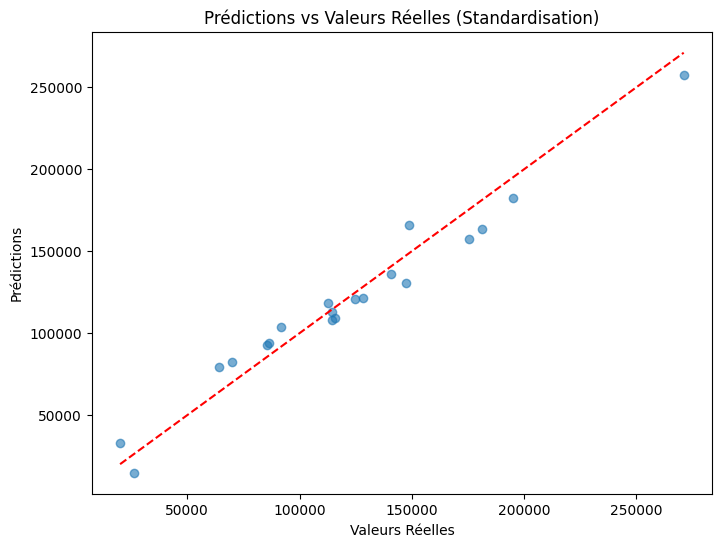

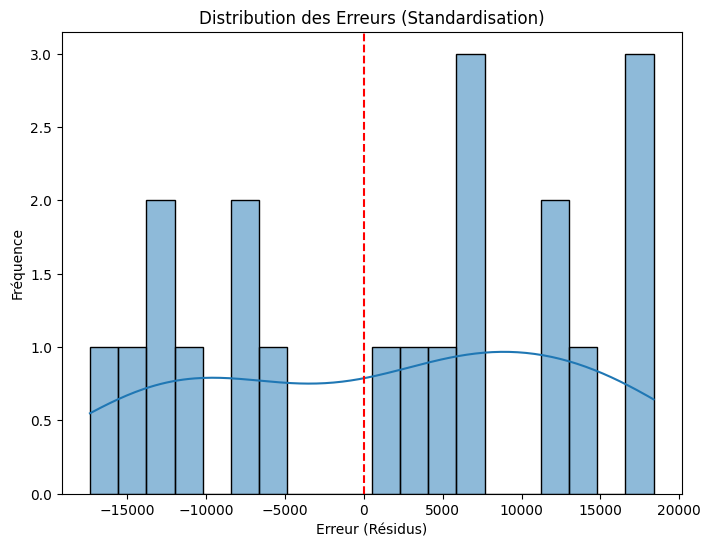

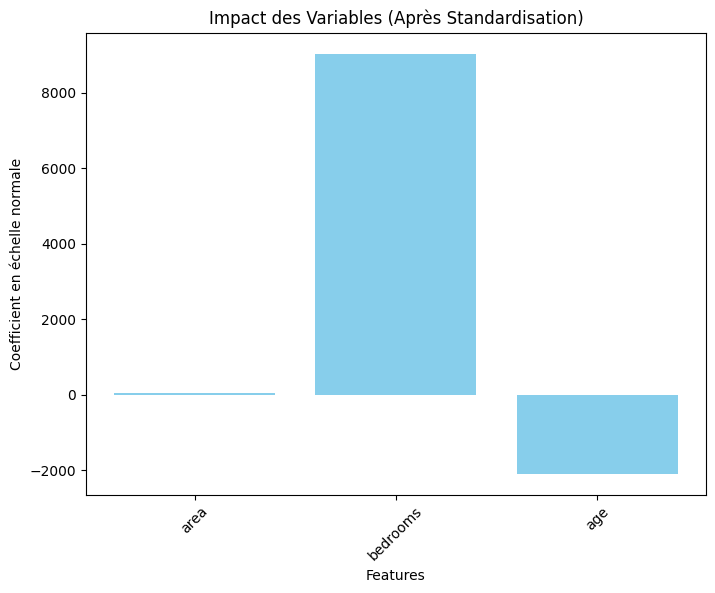

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_scaled, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne idéale
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles (Standardisation)")
plt.show()

residuals = y_test - y_pred_scaled  # Calcul des résidus

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel("Erreur (Résidus)")
plt.ylabel("Fréquence")
plt.title("Distribution des Erreurs (Standardisation)")
plt.show()

# Récupération des coefficients
beta_original = model_scaled.coef_ / scaler.scale_

features = dataset.iloc[:, :-1].columns  # Récupérer les noms des features

plt.figure(figsize=(8, 6))
plt.bar(features, beta_original, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Coefficient en échelle normale")
plt.title("Impact des Variables (Après Standardisation)")
plt.xticks(rotation=45)
plt.show()

# Score the model

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred_scaled)
print("R² Score:", r2)

mae = mean_absolute_error(y_test, y_pred_scaled)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred_scaled)
print("MSE:", mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", rmse)

for features, coef in zip(dataset.iloc[:, :-1].columns, model_scaled.coef_):
    print(f"{features}: {coef:.4f}")

R² Score: 0.9580817770371726
MAE: 10579.953595945317
MSE: 136480334.97781634
RMSE: 11682.479829976868
area: 42925.8317
bedrooms: 9724.6739
age: -31119.6789


The model works completly (96%) the price will increase a lot with rooms (9030$ per room), decrease with the age (2100$ per year) and the area doesn't really matter